In [1]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 KB 2.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 112.2/112.2 KB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 57.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 111.0/111.0 KB 12.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.8/62.8 KB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.4/129.4 KB 11.5 MB/s eta 0:00:00
  Attempting uninstall: requests
    Found existing installation: requests 2.25.1
    Uninstalling requests-2.25.1:
      Successfully uninstalled requests-2.25.1
  Attempting uninstall: html5lib
    Found existing installation: html5lib 1.0.1
    Uninstalling html5lib-1.0.1:
      Successfully uninstalled html5lib-1.0.1
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
   

In [2]:
# import all required dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
from sklearn import metrics
from datetime import datetime
plt.style.use('fivethirtyeight')
%matplotlib inline

In [3]:
from google.colab import files
uploaded = files.upload()

Saving Amazon.csv to Amazon.csv
Saving Apple.csv to Apple.csv
Saving Facebook.csv to Facebook.csv
Saving Google.csv to Google.csv
Saving Microsoft.csv to Microsoft.csv
Saving Netflix.csv to Netflix.csv
Saving Tesla.csv to Tesla.csv


In [158]:
ggl = pd.read_csv("Google.csv")

In [159]:
ggl.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,1/30/2018,58.886002,59.396500,58.725498,58.868500,58.868500,37338000
1,1/31/2018,59.190498,59.316002,58.605000,59.111000,59.111000,36022000
2,2/1/2018,58.799500,59.372501,58.467999,59.079498,59.079498,73514000
3,2/2/2018,56.370998,56.564999,55.558498,55.959999,55.959999,117842000
4,2/5/2018,55.030499,55.749500,52.837002,53.119499,53.119499,83550000


In [160]:
ggl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1258 non-null   object 
 1   Open       1258 non-null   float64
 2   High       1258 non-null   float64
 3   Low        1258 non-null   float64
 4   Close      1258 non-null   float64
 5   Adj Close  1258 non-null   float64
 6   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 68.9+ KB


In [161]:
ma_days = [10,20,50]
for ma in ma_days:
  column_name = f'MA for{ma} days'
  ggl[column_name] = ggl["Adj Close"].rolling(ma).mean()





In [162]:
ggl

,Date,Open,High,Low,Close,Adj Close,Volume,MA for10 days,MA for20 days,MA for50 days
0,1/30/2018,58.886002,59.396500,58.725498,58.868500,58.868500,37338000,NaN,NaN,NaN
1,1/31/2018,59.190498,59.316002,58.605000,59.111000,59.111000,36022000,NaN,NaN,NaN
2,2/1/2018,58.799500,59.372501,58.467999,59.079498,59.079498,73514000,NaN,NaN,NaN
3,2/2/2018,56.370998,56.564999,55.558498,55.959999,55.959999,117842000,NaN,NaN,NaN
4,2/5/2018,55.030499,55.749500,52.837002,53.119499,53.119499,83550000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1253,1/23/2023,97.949997,100.040001,97.500000,99.790001,99.790001,40005100,92.448,90.115000,93.2218
1254,1/24/2023,98.099998,99.610001,97.199997,97.699997,97.699997,33078500,93.416,90.612000,93.4294
1255,1/25/2023,95.570000,96.160004,93.760002,95.220001,95.220001,42330000,94.096,90.911499,93.4550
1256,1/26/2023,96.500000,97.570000,95.379997,97.519997,97.519997,30114000,94.696,91.417999,93.4772


In [163]:
ggl["Date"] = pd.to_datetime(ggl["Date"])

In [164]:
ggl = ggl.set_index("Date")

In [165]:
ggl

,Open,High,Low,Close,Adj Close,Volume,MA for10 days,MA for20 days,MA for50 days
Date,,,,,,,,,
2018-01-30,58.886002,59.396500,58.725498,58.868500,58.868500,37338000,NaN,NaN,NaN
2018-01-31,59.190498,59.316002,58.605000,59.111000,59.111000,36022000,NaN,NaN,NaN
2018-02-01,58.799500,59.372501,58.467999,59.079498,59.079498,73514000,NaN,NaN,NaN
2018-02-02,56.370998,56.564999,55.558498,55.959999,55.959999,117842000,NaN,NaN,NaN
2018-02-05,55.030499,55.749500,52.837002,53.119499,53.119499,83550000,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
2023-01-23,97.949997,100.040001,97.500000,99.790001,99.790001,40005100,92.448,90.115000,93.2218
2023-01-24,98.099998,99.610001,97.199997,97.699997,97.699997,33078500,93.416,90.612000,93.4294
2023-01-25,95.570000,96.160004,93.760002,95.220001,95.220001,42330000,94.096,90.911499,93.4550


In [166]:
#Create new dataframe with only the 'Close Columns'
data = ggl.filter(['Adj Close'])

#Convert the dataframe to a numpy array
dataset = data.values

#Get the number of rows to train the model on
import math
training_data_len = math.ceil(len(dataset) * .7)

training_data_len

881

In [167]:
ggl.shape

(1258, 9)

In [168]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaler_data = scaler.fit_transform(dataset)

scaler_data

array([[0.09577057],
       [0.09818099],
       [0.09786787],
       ...,
       [0.45709955],
       [0.47996119],
       [0.49835   ]])

In [169]:
# Create the training data set
# Create the scaled training dataset
train_data = scaler_data[0:training_data_len, :]

# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i,0])


In [170]:
#Convert the x_train and y_train to numpy array
x_train, y_train = np.array(x_train), np.array(y_train)

In [171]:
#Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1) )
x_train.shape

(821, 60, 1)

In [172]:
# Build the LSTM layer
model = Sequential()
model.add(LSTM(50, return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))


In [173]:
# Compile the model
model.compile(optimizer="adam", loss="mean_squared_error")

In [174]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

821/821 [==============================] - 27s 29ms/step - loss: 0.0017


In [175]:
#Create the testing dataset
#Create a new array having scaled values from index 881 to 1258
test_data = scaler_data[training_data_len - 60: , :]

#Create the data set x_test and y_test
x_test =[]
y_test = dataset[training_data_len:, :]

for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [176]:
# convert the data to a numpy array
x_test = np.array(x_test)

In [177]:
#Reshape the data (need to convert it in 3 d shape for LSTM)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [178]:
# get the models predicted price value
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

12/12 [==============================] - 1s 17ms/step


In [179]:
# Get the root mean squared error (RMSE)
rmse = np.sqrt( np.mean(predictions - y_test)**2)


In [180]:
rmse

2.050913987279096

In [181]:
#plot the data
train = data[: training_data_len]
valid = data[training_data_len:]
valid["Predictions"] = predictions


<ipython-input-181-94cde59c7dfb>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid["Predictions"] = predictions


In [182]:
valid

,Adj Close,Predictions
Date,,
2021-07-30,134.726502,128.286316
2021-08-02,134.854507,129.053543
2021-08-03,135.630005,129.666336
2021-08-04,135.125504,130.202255
2021-08-05,136.251495,130.610565
...,...,...
2023-01-23,99.790001,91.005638
2023-01-24,97.699997,92.223701
2023-01-25,95.220001,93.313255


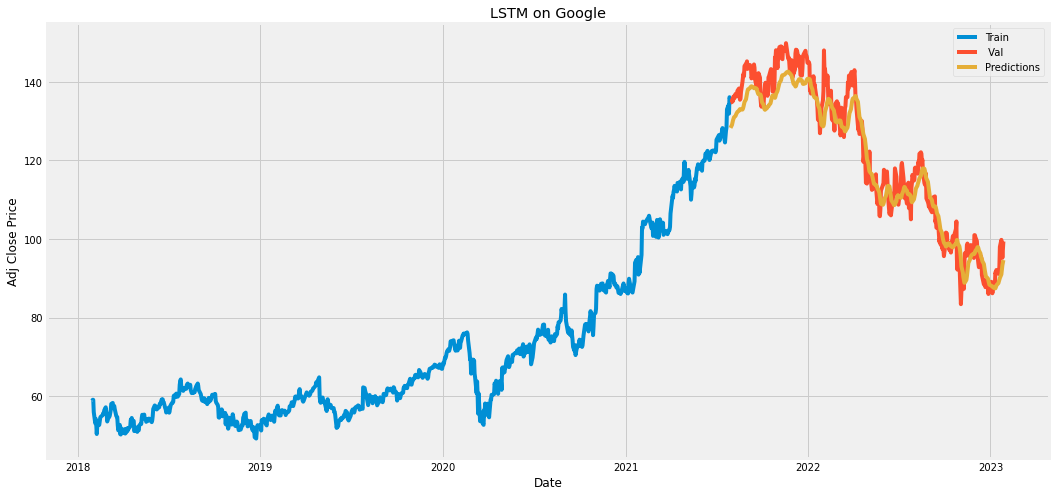

In [184]:
#Visualize the data
plt.figure(figsize=(16,8))
plt.title("LSTM on Google")
plt.xlabel("Date")
plt.ylabel('Adj Close Price')
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', ' Val', 'Predictions'])
plt.show()